In [5]:
%autosave 0

Autosave disabled


# 决策树模型可视化demo

In [6]:
import matplotlib.pyplot as plt

In [7]:
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

In [26]:
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]) is dict:
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]) is dict:
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        maxDepth = max(maxDepth, thisDepth)
    return maxDepth

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt,
                           xy=parentPt,
                           xycoords='axes fraction',
                           xytext=centerPt,
                           textcoords='axes fraction',
                           va='center',
                           ha='center',
                           bbox=nodeType,
                           arrowprops=arrow_args)
    
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va='center', ha='center', rotation=30)
    
def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    cntrPt = (plotTree.xOff + (1 + numLeafs)/2/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    
    firstStr = list(myTree.keys())[0]
    
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    
    secondDict = myTree[firstStr]
    
    plotTree.yOff = plotTree.yOff - 1/plotTree.totalD
    
    for key in secondDict.keys():
        if type(secondDict[key]) is dict:
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1/plotTree.totalD
    
def createPlot(inTree):
    fig = plt.figure(1, facecolor='green')
    fig.clf()
    
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

In [2]:
def createPlot():
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon=False)
    plotNode('a decision node',(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode('a leaf node',(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()

In [15]:
def retrieveTree(i):
    listOfTrees = [
        {'no surfacing':{0:'no', 1:{'flippers':{0:'no',1:'yes'}}}},
        {'no surfacing':{0:'no', 1:{'flippers':{0:{'head':{0:'no',1:'yes'}},1:'no'}}}}
    ]
    return listOfTrees[i]

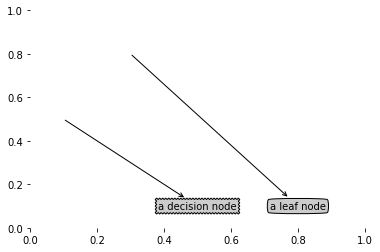

In [9]:
createPlot()

In [17]:
myTree = retrieveTree(1)

In [22]:
myTree.values()

dict_values([{0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}])

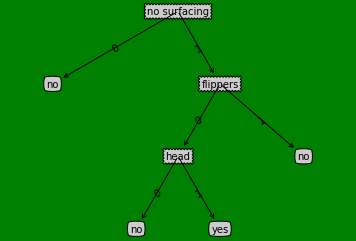

In [27]:
createPlot(myTree)

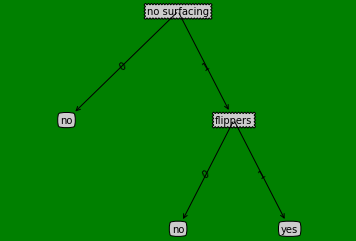

In [28]:
myTree_0 = retrieveTree(0)
createPlot(myTree_0)